In [ ]:
#https://github.com/KasumiL5x/driven-richters-predictor/blob/master/solution.ipynb
#https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

In [1]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Load in and merge both the training values and labels at the same time.
train = pd.merge(pd.read_csv('/content/drive/MyDrive/CSCI 567 project/train_values.csv'), pd.read_csv('/content/drive/MyDrive/CSCI 567 project/train_labels.csv'), on='building_id')

#Load the test data
test = pd.read_csv('/content/drive/MyDrive/CSCI 567 project/test_values.csv')

In [3]:
train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [4]:
test.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Check to see if there are any null values
print('{} missing train values.'.format(sum(train.isnull().any(1))))
print('{} missing train values.'.format(sum(test.isnull().any(1))))
#train.isnull().sum()

<ipython-input-5-47c1a417f7f5>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  print('{} missing train values.'.format(sum(train.isnull().any(1))))


0 missing train values.
0 missing train values.


<ipython-input-5-47c1a417f7f5>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  print('{} missing train values.'.format(sum(test.isnull().any(1))))


In [6]:
#summary Statistics on each of the Training features and output
train.describe().applymap(lambda x: f"{x:0.2f}")

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,260601.00,260601.00,260601.00,260601.00,260601.00,260601.00,260601.00,260601.00,260601.00,260601.00,...,260601.00,260601.00,260601.00,260601.00,260601.00,260601.00,260601.00,260601.00,260601.00,260601.00
mean,525675.48,13.90,701.07,6257.88,2.13,26.54,8.02,5.43,0.09,0.76,...,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,2.24
std,304545.00,8.03,412.71,3646.37,0.73,73.57,4.39,1.92,0.28,0.43,...,0.18,0.09,0.03,0.02,0.03,0.01,0.01,0.01,0.07,0.61
min,4.00,0.00,0.00,0.00,1.00,0.00,1.00,2.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,261190.00,7.00,350.00,3073.00,2.00,10.00,5.00,4.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
50%,525757.00,12.00,702.00,6270.00,2.00,15.00,7.00,5.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
75%,789762.00,21.00,1050.00,9412.00,2.00,30.00,9.00,6.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
max,1052934.00,30.00,1427.00,12567.00,9.00,995.00,100.00,32.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00


In [7]:
#summary Statistics on each of the Test features
test.describe().applymap(lambda x: f"{x:0.2f}")

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,86868.00,86868.00,86868.00,86868.00,86868.00,86868.00,86868.00,86868.00,86868.00,86868.00,...,86868.00,86868.00,86868.00,86868.00,86868.00,86868.00,86868.00,86868.00,86868.00,86868.00
mean,526627.88,13.89,704.13,6261.76,2.13,26.55,8.01,5.44,0.09,0.76,...,0.06,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,303782.84,8.03,413.36,3648.71,0.73,73.41,4.38,1.91,0.29,0.43,...,0.24,0.18,0.09,0.03,0.02,0.03,0.01,0.01,0.01,0.07
min,7.00,0.00,0.00,0.00,1.00,0.00,1.00,2.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,264421.50,7.00,350.00,3073.00,2.00,10.00,5.00,4.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,526983.50,12.00,709.00,6276.00,2.00,15.00,7.00,5.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,789084.25,21.00,1054.00,9416.00,2.00,30.00,9.00,6.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1052923.00,30.00,1427.00,12567.00,8.00,995.00,92.00,32.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [8]:
train.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [9]:
categorical_features = ['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position','plan_configuration','legal_ownership_status']

In [10]:
#Check to make sure categorical data has some variation
print('Train')
for cat in categorical_features:
    print('  {}: {}\n'.format(cat, train[cat].unique()),'Counts\n',train[cat].value_counts())
    #print(train[cat].value_counts())

    #Check to make sure categorical data has some variation
print('Test')
for cat in categorical_features:
    print('  {}: {}\n'.format(cat, test[cat].unique()),'Counts\n',test[cat].value_counts())
    #print(train[cat].value_counts())

Train
  land_surface_condition: ['t' 'o' 'n']
 Counts
 t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64
  foundation_type: ['r' 'w' 'i' 'u' 'h']
 Counts
 r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64
  roof_type: ['n' 'q' 'x']
 Counts
 n    182842
q     61576
x     16183
Name: roof_type, dtype: int64
  ground_floor_type: ['f' 'x' 'v' 'z' 'm']
 Counts
 f    209619
x     24877
v     24593
z      1004
m       508
Name: ground_floor_type, dtype: int64
  other_floor_type: ['q' 'x' 'j' 's']
 Counts
 q    165282
x     43448
j     39843
s     12028
Name: other_floor_type, dtype: int64
  position: ['t' 's' 'j' 'o']
 Counts
 s    202090
t     42896
j     13282
o      2333
Name: position, dtype: int64
  plan_configuration: ['d' 'u' 's' 'q' 'm' 'c' 'a' 'n' 'f' 'o']
 Counts
 d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
m        46
n        38
f        22
Name: plan_configuration, d

<Axes: title={'center': 'Number of Buildings with Each Damage Grade'}>

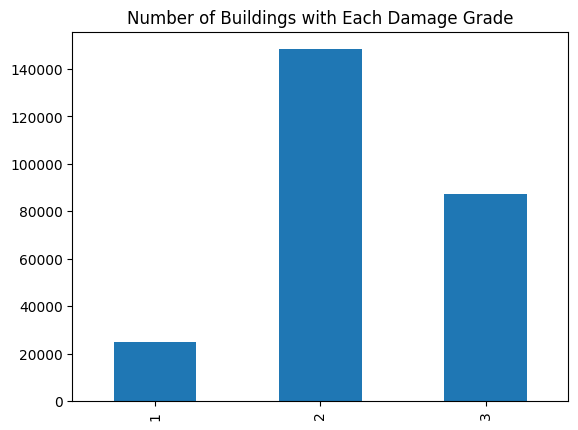

In [11]:
(train.damage_grade
             .value_counts()
             .sort_index()
             .plot.bar(title="Number of Buildings with Each Damage Grade"))

In [12]:
#Drop the ID column from the training set
train.drop('building_id', axis=1, inplace=True)

# Spilt the ID column from the test, and store them separately
test_building_id = test.building_id
test.drop('building_id', axis=1, inplace=True)

In [14]:
# Create and fit encoder.
from sklearn.preprocessing import OneHotEncoder
train_categorical_cols = train.select_dtypes('object').columns

encoder = OneHotEncoder(sparse_output=False, dtype=int, handle_unknown='ignore')
encoder.fit(train[train_categorical_cols])

# Train data: Convert categorical data
train = pd.concat([
    train.drop(train_categorical_cols, axis=1),
    pd.DataFrame(encoder.transform(train[train_categorical_cols]), columns=encoder.get_feature_names_out(train_categorical_cols))], axis=1)

In [15]:
train.dtypes

geo_level_1_id              int64
geo_level_2_id              int64
geo_level_3_id              int64
count_floors_pre_eq         int64
age                         int64
                            ...  
plan_configuration_u        int64
legal_ownership_status_a    int64
legal_ownership_status_r    int64
legal_ownership_status_v    int64
legal_ownership_status_w    int64
Length: 69, dtype: object

In [17]:
#Use for Training
X = train.drop('damage_grade', axis=1)
Y = train.damage_grade

In [18]:
from sklearn.feature_selection import SelectKBest, chi2

# Calculate the actual features.
num_features = 15
best_features = SelectKBest(score_func=chi2, k=num_features)
best_features.fit(X, Y)

# Filter out the train and test set.
best_indices = best_features.get_support(indices=True)
X = X[X.columns[best_indices]]
#test = test[test.columns[best_indices]]

pd.DataFrame(zip(X.columns, best_features.scores_), columns=['Feature', 'Score']).sort_values('Score', ascending=False).head(num_features)

,Feature,Score
1,geo_level_2_id,128238.967545
4,area_percentage,89437.601577
2,geo_level_3_id,83664.759142
0,geo_level_1_id,24186.950757
12,ground_floor_type_v,18949.414382
5,has_superstructure_mud_mortar_stone,11938.314628
8,has_superstructure_rc_engineered,6969.601844
7,has_superstructure_rc_non_engineered,1340.145544
3,age,1241.172305
9,foundation_type_i,1108.404575


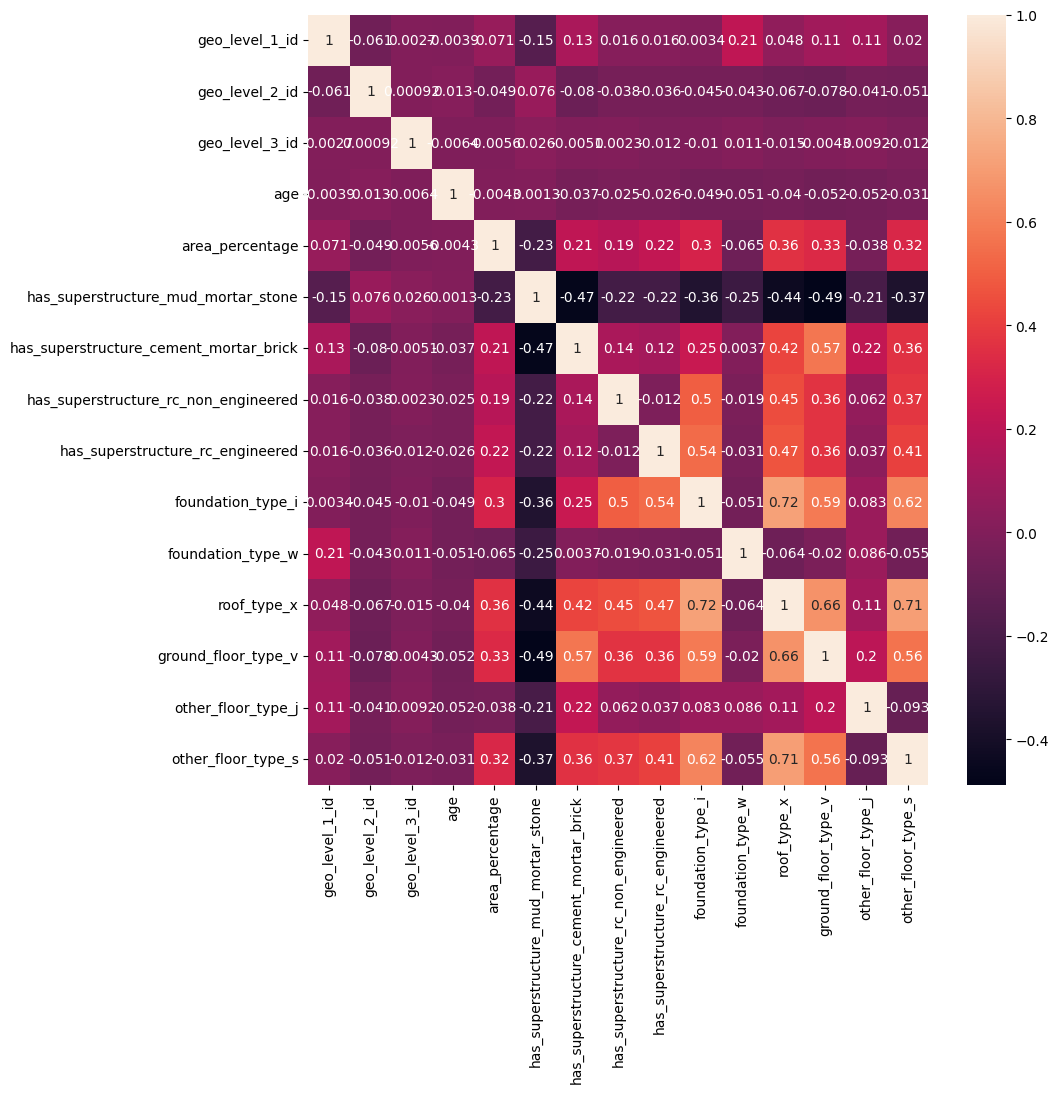

In [22]:
#Correlations
#Let's now look at the correlations between all selected features. 
#There are a few questionable correlations, but they can be left for now as an area for improvement.
train_corr = X.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(train_corr, xticklabels=train_corr.columns, yticklabels=train_corr.columns, annot=True)
plt.show()

In [21]:
train_corr.style.background_gradient(sns.diverging_palette(220, 10, as_cmap=True), axis=1)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,age,area_percentage,has_superstructure_mud_mortar_stone,has_superstructure_cement_mortar_brick,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,foundation_type_i,foundation_type_w,roof_type_x,ground_floor_type_v,other_floor_type_j,other_floor_type_s
geo_level_1_id,1.000000,-0.061405,0.002718,-0.003908,0.071158,-0.152038,0.134121,0.016454,0.015767,0.003362,0.212048,0.048272,0.110563,0.112915,0.020317
geo_level_2_id,-0.061405,1.000000,0.000921,0.012594,-0.049443,0.076491,-0.079875,-0.038173,-0.036074,-0.044893,-0.042831,-0.067152,-0.078279,-0.040881,-0.050574
geo_level_3_id,0.002718,0.000921,1.000000,-0.006385,-0.005643,0.026294,-0.005116,0.002265,-0.012420,-0.010494,0.010621,-0.014635,-0.004325,0.009160,-0.012337
age,-0.003908,0.012594,-0.006385,1.000000,-0.004323,0.001321,-0.036992,-0.025431,-0.025552,-0.048860,-0.051184,-0.040087,-0.052342,-0.051634,-0.031045
area_percentage,0.071158,-0.049443,-0.005643,-0.004323,1.000000,-0.225541,0.210800,0.185047,0.224647,0.301688,-0.064849,0.357777,0.328150,-0.037512,0.317857
has_superstructure_mud_mortar_stone,-0.152038,0.076491,0.026294,0.001321,-0.225541,1.000000,-0.470715,-0.222366,-0.224509,-0.359323,-0.251562,-0.437898,-0.487756,-0.206889,-0.366995
has_superstructure_cement_mortar_brick,0.134121,-0.079875,-0.005116,-0.036992,0.210800,-0.470715,1.000000,0.138915,0.121070,0.246290,0.003677,0.419886,0.573645,0.224796,0.356077
has_superstructure_rc_non_engineered,0.016454,-0.038173,0.002265,-0.025431,0.185047,-0.222366,0.138915,1.000000,-0.012324,0.499215,-0.019256,0.445971,0.362685,0.062207,0.373658
has_superstructure_rc_engineered,0.015767,-0.036074,-0.012420,-0.025552,0.224647,-0.224509,0.121070,-0.012324,1.000000,0.540876,-0.030715,0.466875,0.362155,0.037306,0.412847
foundation_type_i,0.003362,-0.044893,-0.010494,-0.048860,0.301688,-0.359323,0.246290,0.499215,0.540876,1.000000,-0.051047,0.718842,0.586806,0.082859,0.617345


In [23]:
#The age column is rather skewed right. There is a few old buildings which cause this skew. 
#Usually they could be removed, but the test data also contains old buildings. 
#Instead, to normalize the skew, we can just log the value.
X.skew()

geo_level_1_id                             0.272530
geo_level_2_id                             0.028957
geo_level_3_id                             0.000394
age                                       12.192494
area_percentage                            3.526082
has_superstructure_mud_mortar_stone       -1.230040
has_superstructure_cement_mortar_brick     3.219832
has_superstructure_rc_non_engineered       4.530387
has_superstructure_rc_engineered           7.750517
foundation_type_i                          4.655788
foundation_type_w                          3.781474
roof_type_x                                3.629014
ground_floor_type_v                        2.775040
other_floor_type_j                         1.929047
other_floor_type_s                         4.326060
dtype: float64

In [ ]:
#Can transform in other ways - try spline but can do in the regression step - relaxing age and the lablel from a simple linear relationship
#X['age'] = np.log(X.age.replace(0, np.nan)).replace(np.nan, 0)

In [25]:
X.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,age,area_percentage,has_superstructure_mud_mortar_stone,has_superstructure_cement_mortar_brick,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,foundation_type_i,foundation_type_w,roof_type_x,ground_floor_type_v,other_floor_type_j,other_floor_type_s
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,0.463345,0.491293,0.497961,0.026668,0.070889,0.761935,0.075268,0.042590,0.015859,0.040595,0.058012,0.062099,0.094370,0.152889,0.046155
std,0.267787,0.289216,0.290154,0.073936,0.044366,0.425900,0.263824,0.201931,0.124932,0.197350,0.233767,0.241335,0.292344,0.359881,0.209821
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.233333,0.245270,0.244529,0.010050,0.040404,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.400000,0.491941,0.498926,0.015075,0.060606,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.700000,0.735809,0.748946,0.030151,0.080808,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
